# Lab Assignment One: Exploring Table Data

# 1. Business Understanding:

&emsp; This dataset provides details of diamonds. Diamonds symbolize eternity, so people put them in wedding rings. As far as consumers are concerned, most people do not know anything about diamonds. People have all kinds of doubts, such as: how many carats can people buy on their own budget? In addition to carats, what are the characteristics that you need to pay special attention to when buying? Do the bigger the diamonds, the more expensive they must be? And so on. For companies, it would be easier to make money if they had a model that could accurately predict the current market price of each diamond and thus more accurately control their net profit. In addition, the company can accurately determine the purchase needs of each customer to the model and recommend the most suitable diamond products to customers. As a result, the company can sell more diamonds and make more money.<br> 
&emsp; Therefore, this prediction task is to analyze the relationship between the price per unit of diamonds with carat, cut, color, clarity, depth, and table so as to predict which factors have more weight on the price per unit. Then the model is trained by matching each feature according to different weight values. And it ends up with a trained model.<br> 
&emsp; Third parties can input each characteristic parameter of the new diamond according to the model so as to predict the market price of the diamond. The predicted market price can then be appropriately multiplied by 1.1 or 0.9 as the selling price. In addition, the third parties price prediction platform open to consumers can set the price forecast value to 1.1 times the actual forecast value. For consumers, even if the predicted value is 10% higher than the actual value, it will increase their desire to buy diamonds more than if they knew nothing about the price. Besides, when the third parties sell at 0.9 times the market price, consumers will have a greater interest in purchasing, thus increasing the sales volume.

# 2. Data Understanding:

## 2.1 Data Description:
First of all, we should load the diamonds dataset

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Diamonds Prices2022.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Because the index is a useless column, it can be dropped.

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Set 'price' to the output coulumn.

In [5]:
df = df[['carat', 'cut', 'color', 'clarity',
         'depth', 'table', 'x', 'y', 'z', 'price']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   x        53943 non-null  float64
 7   y        53943 non-null  float64
 8   z        53943 non-null  float64
 9   price    53943 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### The features description:
&emsp; Carat represents the weight of a diamond.<br> 
&emsp; Cut represents the balance of proportion, symmetry and polishing of the finished diamond after the diamond cutter finishes cutting the diamond.<br>
&emsp; Color represents the natural color of a diamond.<br>
&emsp; Clarity reprensents the purity level of a diamond, or the amount of impurities in a diamond.<br>
&emsp; Depth represents the percentage of diamond height divided by average waist diameter of diamond <br>
&emsp; Table represents the proportion of diamond top plane area to diamond overall plane area<br>
&emsp; X represents the length of a  diamond.<br>
&emsp; Y represents the width of a diamond.<br>
&emsp; Z represents the height of a diamond.<br>
&emsp; Price represents the price of a diamond.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00


In [7]:
data_description = pd.DataFrame()
data_description['Features'] = df.columns
data_description['Description'] = ['Weight', 'Diamonds cut quality', 'Diamonds color', 
                                   'Clarity of diamonds', 'Depth(z)/Length(x) of diamonds',
                                   'The width of the table as a percentage of the total \
                                    midth of the diamonds',
                                   'Length of diamonds', 'Width of diamonds',
                                   'Height of diamonds','diamonds price']
data_description['Scales'] = ['ratio', 'ordinal', 'ordinal', 'ordinal', 'nominal',
                              'nominal','ratio', 'ratio', 'ratio', 'ratio']
data_description['Discrete/Continues'] = ['continues', 'discrete', 'discrete', 'discrete',
                                          'discrete','discrete','continues',
                                          'continues', 'continues', 'continues']
data_description['Range'] = ['0.2-5.01', '0:Fair, 1:Good, 2:Very Good, 3:Premium, 4:Ideal',
                             '0:J, 1:I, 2:H, 3:G, 4:F, 5:E, 6:D',
                             '0:I1, 1:SI2, 2:SI1, 3: VS2, 4:VS1, 5:VVS2, 6:VVS1, 7:IF',
                             '0:41-46 or 74-79, 1:47-52 or 69-73, 2:53-57 or 64-68, 3:58-63',
                             '0:30-39 or 90-99, 1:40-49 or 80-89, 2:50-59 or 70-79, 3:60-69',
                             '3.73-10.74', '3.68-58.9', '1.07-31.8','\$326-\$18823']

data_description

,Features,Description,Scales,Discrete/Continues,Range
0,carat,Weight,ratio,continues,0.2-5.01
1,cut,Diamonds cut quality,ordinal,discrete,"0:Fair, 1:Good, 2:Very Good, 3:Premium, 4:Ideal"
2,color,Diamonds color,ordinal,discrete,"0:J, 1:I, 2:H, 3:G, 4:F, 5:E, 6:D"
3,clarity,Clarity of diamonds,ordinal,discrete,"0:I1, 1:SI2, 2:SI1, 3: VS2, 4:VS1, 5:VVS2, 6:V..."
4,depth,Depth(z)/Length(x) of diamonds,nominal,discrete,"0:41-46 or 74-79, 1:47-52 or 69-73, 2:53-57 or..."
5,table,The width of the table as a percentage of the ...,nominal,discrete,"0:30-39 or 90-99, 1:40-49 or 80-89, 2:50-59 or..."
6,x,Length of diamonds,ratio,continues,3.73-10.74
7,y,Width of diamonds,ratio,continues,3.68-58.9
8,z,Height of diamonds,ratio,continues,1.07-31.8
9,price,diamonds price,ratio,continues,\$326-\$18823


&emsp; 'carat', 'x', 'y' and 'z' should be represented by ratio data type. Because they have relative zero point. And their values are monotonically increasing through the relative zero point.<br> 
&emsp; 'cut', 'color', 'clarity' and 'price' should be represented by ordinal data type. Because they discribe a level from poor to good and can be represented equally by particular values.<br> 
&emsp; We used hash code to represent different 'depth' and 'table' range. Therefore 'depth' and 'table' should be represented by nominal data type.

## 2.2 Data Quality:

&emsp; The first thing we need to do in this part, is checking whether there are missing or duplicate data.

In [8]:
df.isnull().values.sum()

0

&emsp; The output shows that there is no massing data in this dataset. And We also can use 'missingo' package to visualize the data and make our conclusion more conceivable.

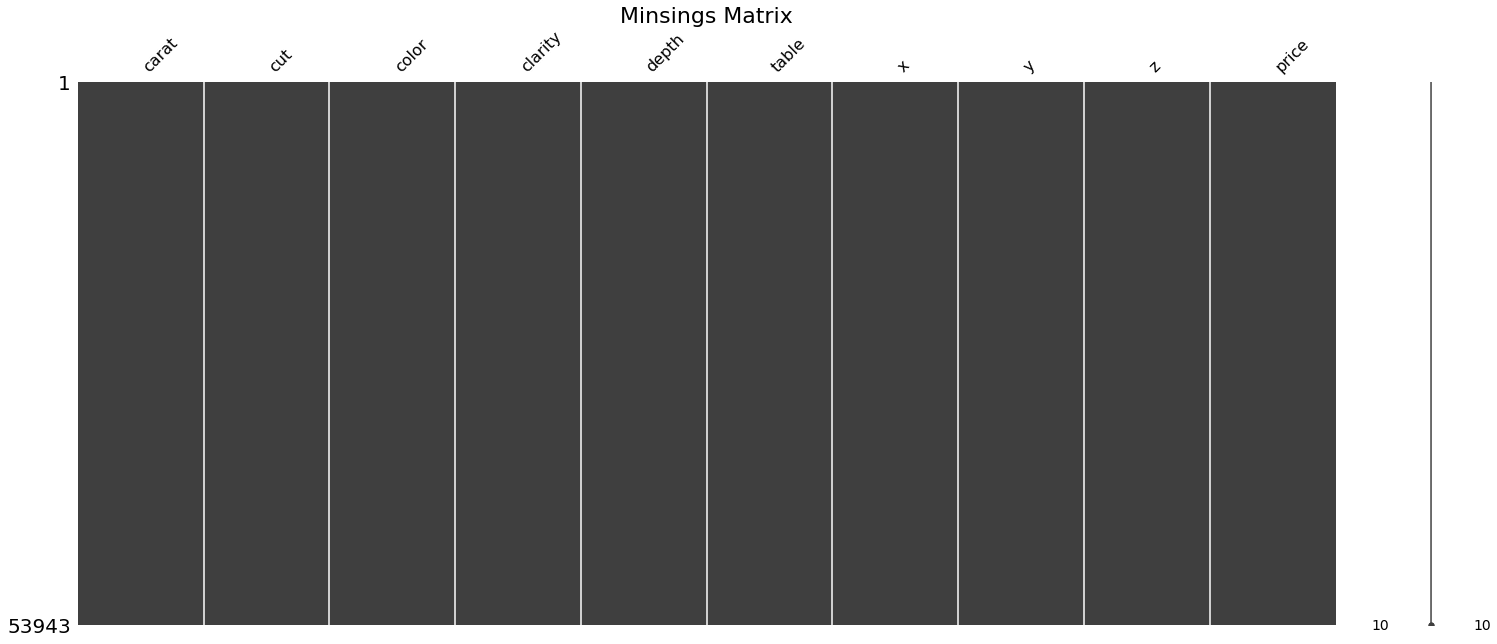

<Figure size 432x288 with 0 Axes>

In [9]:
import missingno as mn
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import missingno as mn

mn.matrix(df)
plt.title('Minsings Matrix', fontsize=22)
plt.figure()
plt.show()

&emsp; From the Missing Matrix above, we can see no blank exist in every attribute bar. No missing data could be conduct.

&emsp; However, invalid value could exist even if there is no missing.

In [10]:
print(df.x.min())
print(df.y.min())
print(df.z.min())

0.0
0.0
0.0


&emsp; As a common understanding, length, width and height of a diamonds can not be zero. So we should drop all incorrect data row where x=0, y=0 or z=0.

In [11]:
df = df.loc[df['x'] != 0]
df = df.loc[df['y'] != 0]
df = df.loc[df['z'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53923 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53923 non-null  float64
 1   cut      53923 non-null  object 
 2   color    53923 non-null  object 
 3   clarity  53923 non-null  object 
 4   depth    53923 non-null  float64
 5   table    53923 non-null  float64
 6   x        53923 non-null  float64
 7   y        53923 non-null  float64
 8   z        53923 non-null  float64
 9   price    53923 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


&emsp; Now we should check whether duplicate data exists.

In [12]:
deplicate_index_list = df.duplicated()
print(len(df[deplicate_index_list]))

148


&emsp; There are 148 duplicate items. We need to drop them all.

In [13]:
deplicate_index_list = df.duplicated()
df = df[~deplicate_index_list]
deplicate_index_list = df.duplicated()
print(len(df[deplicate_index_list]))
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53775 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float64
 5   table    53775 non-null  float64
 6   x        53775 non-null  float64
 7   y        53775 non-null  float64
 8   z        53775 non-null  float64
 9   price    53775 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


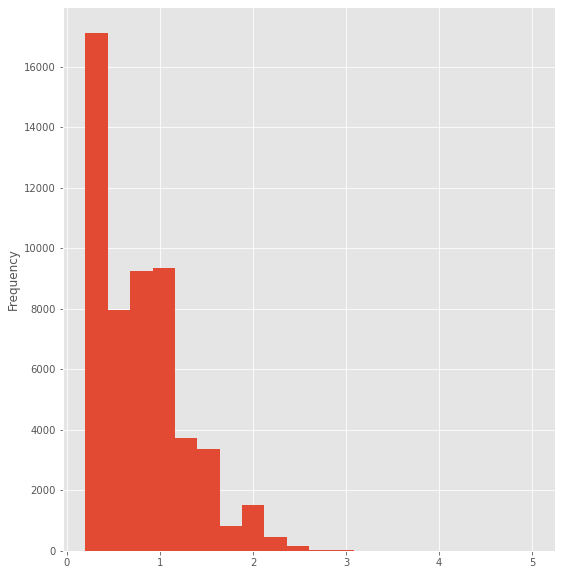

In [14]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
df.carat.plot.hist(bins=20)
plt.show()

&emsp; According to the picture, the weight of most diamonds in this database is less than 1.5 carats. And the main buyers of diamonds are the working class. They are more likely to accept the price of diamonds under 1.5 carats. So we decide to keep only the information of diamonds less than or equal to 1.5 carats.

In [15]:
df = df.loc[df['carat'] <= 1.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48364 non-null  float64
 1   cut      48364 non-null  object 
 2   color    48364 non-null  object 
 3   clarity  48364 non-null  object 
 4   depth    48364 non-null  float64
 5   table    48364 non-null  float64
 6   x        48364 non-null  float64
 7   y        48364 non-null  float64
 8   z        48364 non-null  float64
 9   price    48364 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


&emsp; We decide to add three attributes, carat_range, price_per_unit and price_per_unit_range, and drop price column. The weights of diamonds are various. The reason why we introduce 'carat_range' is that the weight difference of the samples taken during comparison will not be too large.<br>
&emsp; We define the carat_range value as 0.2 if its carat value is in the range of [0.199, 0.29], as 0.3 if its carat value is in the range of [0.30, 0.39], as 0.4 if its carat value is in the range of [0.40, 0.49], as 0.5 if its carat value is in the range of [0.50, 0.59], as 0.6 if its carat value is in the range of [0.60, 0.69], as 0.7 if its carat value is in the range of [0.70, 0.79], as 0.8 if its carat value is in the range of [0.80, 0.89], as 0.9 if its carat value is in the range of [0.90, 0.99], as 1.0 if its carat value is in the range of [1.0, 1.09], as 1.1 if its carat value is in the range of [1.10, 1.19], as 1.2 if its carat value is in the range of [1.20, 1.29], as 1.3 if its carat value is in the range of [1.30, 1.39], as 1.4 if its carat value is in the range of [1.40, 1.49] and as 1.5 if its carat value is in the range of [1.5, 1.59].<br>
&emsp; 'price per unit' represents the one unit carat price of this sepecific diamond.<br>
&emsp; 'price_per_unit_range' only gets 0 and 1 value. 0 value represents the one carat price of this sepecific diamond is lower than mean value of one carat price of all diamonds. 1 value represents the one carat price of this sepecific diamond is greater than mean value of one carat price of all diamonds.

In [16]:
df['carat_range'] = pd.cut(df['carat'],
                           [0.199, 0.3, 0.4, 0.5, 0.6, 0.7,
                            0.8, 0.9, 1.0, 1.1, 1.2,
                            1.3, 1.4, 1.5],
                           labels=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,\
                                   0.9, 1.0, 1.1, 1.2, 1.3, 1.4])
df['price_per_unit'] = df['price'] / df['carat']
df['price_per_unit_range'] = pd.cut(df['price_per_unit'],
                                    [0, df.price_per_unit.mean(),
                                    float("inf")],labels=[0, 1])
df['price_per_unit_range'].value_counts()
df = df.drop(['price'], axis=1)

df.columns = ['carat', 'cut_value', 'color', 'clarity', 'depth', 'table', 'x', 'y',
              'z', 'carat_range', 'price_per_unit', 'price_per_unit_range']
df = df[['carat', 'carat_range', 'cut_value', 'color', 'clarity', 'depth', 'table',
         'x', 'y', 'z', 'price_per_unit', 'price_per_unit_range']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   carat                 48364 non-null  float64 
 1   carat_range           48364 non-null  category
 2   cut_value             48364 non-null  object  
 3   color                 48364 non-null  object  
 4   clarity               48364 non-null  object  
 5   depth                 48364 non-null  float64 
 6   table                 48364 non-null  float64 
 7   x                     48364 non-null  float64 
 8   y                     48364 non-null  float64 
 9   z                     48364 non-null  float64 
 10  price_per_unit        48364 non-null  float64 
 11  price_per_unit_range  48364 non-null  category
dtypes: category(2), float64(7), object(3)
memory usage: 4.2+ MB


### Numerical cut classification:
&emsp; We decide to use 4 to represent Ideal, 3 to represent Premium, 2 to represent Very Good, 1 to reprecent Good and 0 to represent Fair. The higher the value, the higher the cut level.

In [17]:
dic_cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df['cut_value'] = df.cut_value.map(dic_cut)
df.head()

,carat,carat_range,cut_value,color,clarity,depth,table,x,y,z,price_per_unit,price_per_unit_range
0,0.23,0.2,4,E,SI2,61.5,55.0,3.95,3.98,2.43,1417.391304,0
1,0.21,0.2,3,E,SI1,59.8,61.0,3.89,3.84,2.31,1552.380952,0
2,0.23,0.2,1,E,VS1,56.9,65.0,4.05,4.07,2.31,1421.739130,0
3,0.29,0.2,3,I,VS2,62.4,58.0,4.20,4.23,2.63,1151.724138,0
4,0.31,0.3,1,J,SI2,63.3,58.0,4.34,4.35,2.75,1080.645161,0


### Numerical color classification:
&emsp; We decide to use 6 to represent D, 5 to represent E, 4 to represent F, 3 to reprecent G, 2 to reprecent H, 1 to reprecent I and 0 to represent J. The higher the value, the higher the color level.

In [18]:
dic_color = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
df['color'] = df.color.map(dic_color)
df.head()

,carat,carat_range,cut_value,color,clarity,depth,table,x,y,z,price_per_unit,price_per_unit_range
0,0.23,0.2,4,5,SI2,61.5,55.0,3.95,3.98,2.43,1417.391304,0
1,0.21,0.2,3,5,SI1,59.8,61.0,3.89,3.84,2.31,1552.380952,0
2,0.23,0.2,1,5,VS1,56.9,65.0,4.05,4.07,2.31,1421.739130,0
3,0.29,0.2,3,1,VS2,62.4,58.0,4.20,4.23,2.63,1151.724138,0
4,0.31,0.3,1,0,SI2,63.3,58.0,4.34,4.35,2.75,1080.645161,0


### Numerical clarity classification:
&emsp; We decide to use 7 to represent IF, 6 to represent VVS1, 5 to represent VVS2, 4 to reprecent VS1, 3 to reprecent VS2, 2 to reprecent SI1, 1 to represent SI2 and 0 to represent I1. The higher the value, the higher the clarity level.

In [19]:
dic_clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
df['clarity'] = df.clarity.map(dic_clarity)
df.head()

,carat,carat_range,cut_value,color,clarity,depth,table,x,y,z,price_per_unit,price_per_unit_range
0,0.23,0.2,4,5,1,61.5,55.0,3.95,3.98,2.43,1417.391304,0
1,0.21,0.2,3,5,2,59.8,61.0,3.89,3.84,2.31,1552.380952,0
2,0.23,0.2,1,5,4,56.9,65.0,4.05,4.07,2.31,1421.739130,0
3,0.29,0.2,3,1,3,62.4,58.0,4.20,4.23,2.63,1151.724138,0
4,0.31,0.3,1,0,1,63.3,58.0,4.34,4.35,2.75,1080.645161,0


### Numerical depth classification:
&emsp; We know the maximum value of depth is 79 percent and the minimum value is 43 percent. Because the ideal diamond depth is between 58 and 63 percent. We will define the depth level as 3 if this depth value is in the range of [58, 63], as 2 if this depth value is in the range of [53, 57] or [64, 68], as 1 if this depth value is in the range of [47, 52] or [69, 73], as 0 if this depth value is in the range of [41, 46] or [74, 79].

In [20]:
df['depth'] = pd.cut(df['depth'],[41.0, 47.0, 53.0, 58.0, 64.0, 69.0, 74.0, 79.0],
                     labels=[0, 1, 2, 3, 2, 1, 0],
                     ordered=False)
df.head()

,carat,carat_range,cut_value,color,clarity,depth,table,x,y,z,price_per_unit,price_per_unit_range
0,0.23,0.2,4,5,1,3,55.0,3.95,3.98,2.43,1417.391304,0
1,0.21,0.2,3,5,2,3,61.0,3.89,3.84,2.31,1552.380952,0
2,0.23,0.2,1,5,4,2,65.0,4.05,4.07,2.31,1421.739130,0
3,0.29,0.2,3,1,3,3,58.0,4.20,4.23,2.63,1151.724138,0
4,0.31,0.3,1,0,1,3,58.0,4.34,4.35,2.75,1080.645161,0


### Numerical table classification:
&emsp; As we can see, the maximum value of table is 95 percent and the minimum value is 43 percent.Because the ideal table takes up 60 to 69 percent of the width of the diamond. We will define the table level as 3 when this table value laid in the range of [60, 69], as 2 when this table value laid in the range of [50, 59] or [70, 79], as 1 when this table value laid in the range of [40, 49] or [80, 89], as 0 when this table value laid in the range of [30, 39] or [90, 100].

In [21]:
df['table'] = pd.cut(df['table'],[30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
                     labels=[0, 1, 2, 3, 2, 1, 0],
                     ordered=False)
df.head()

,carat,carat_range,cut_value,color,clarity,depth,table,x,y,z,price_per_unit,price_per_unit_range
0,0.23,0.2,4,5,1,3,2,3.95,3.98,2.43,1417.391304,0
1,0.21,0.2,3,5,2,3,3,3.89,3.84,2.31,1552.380952,0
2,0.23,0.2,1,5,4,2,3,4.05,4.07,2.31,1421.739130,0
3,0.29,0.2,3,1,3,3,2,4.20,4.23,2.63,1151.724138,0
4,0.31,0.3,1,0,1,3,2,4.34,4.35,2.75,1080.645161,0


# 3. Data Visualization:

## 3.1 Visualize basic feature distributions:

### 3.1.1 Carats Distribution:

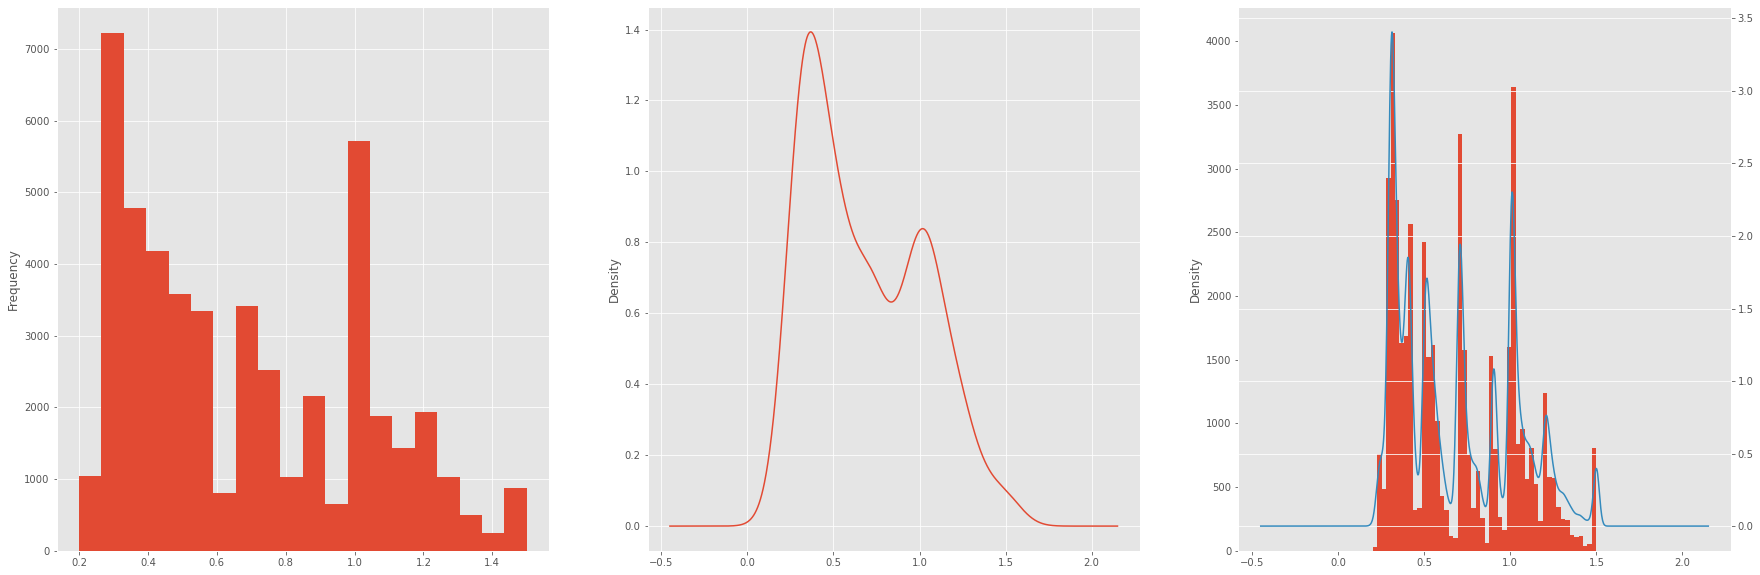

In [22]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
df.carat.plot.hist(bins=20)

plt.subplot(1,3,2)
df.carat.plot.kde(bw_method=0.3)

plt.subplot(1,3,3)
df.carat.plot.hist(bins=50)
df.carat.plot.kde(bw_method=0.05, secondary_y=True)

plt.show()

&emsp; As we can see from the combination diagram of Histogram and Kernel Density Estimation, the weight of most diamonds is between 0.2 and 0.4 carat. What's more, the number of diamonds between 0.2 carat and 1.5 carat decreases as the weight increases, and there is not much fluctuation. We can conduct that this dataset is great.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   carat                 48364 non-null  float64 
 1   carat_range           48364 non-null  category
 2   cut_value             48364 non-null  int64   
 3   color                 48364 non-null  int64   
 4   clarity               48364 non-null  int64   
 5   depth                 48364 non-null  category
 6   table                 48364 non-null  category
 7   x                     48364 non-null  float64 
 8   y                     48364 non-null  float64 
 9   z                     48364 non-null  float64 
 10  price_per_unit        48364 non-null  float64 
 11  price_per_unit_range  48364 non-null  category
dtypes: category(4), float64(5), int64(3)
memory usage: 3.5 MB


In [24]:
df_grouped = df.groupby(by=['carat_range'])
numeric_columns = ['cut_value', 'color', 'clarity', 'depth', 'table', 'price_per_unit']
df_imputed = df_grouped[numeric_columns]
df_imputed

### 3.1.2 Price Per Unit by Carat

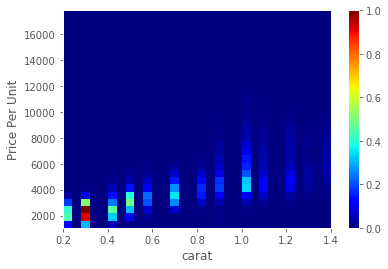

In [25]:
plt.hist2d(x=df.carat_range, y=df.price_per_unit, bins=30, cmap='jet')
plt.colorbar(matplotlib.cm.ScalarMappable(cmap='jet'))
plt.xlabel("carat")
plt.ylabel("Price Per Unit")
plt.show()

&emsp; This heat map reflects the distribution of price per unit of carat. From the heat map, we could know the distribution of price per unit of carat will increase to a certain extent as the specific diamond carat increases. The price per unit of carat of most diamonds will not exceed 3000, if the specific diamond weighing between 0.2 and 0.4 carat. As the diamonds heavier than 1.2 carat, the value of price per unit of carat becomes unclear.

### 3.1.3 Is there a better way to show how each feature affects the price per unit of diamonds?

#### eli5 method:

In [26]:
import sklearn
import eli5

x = df.iloc[:,1:-5]
y = df.iloc[:,-2]
model = sklearn.ensemble.RandomForestRegressor().fit(x,y)
perm = eli5.sklearn.PermutationImportance(model).fit(x, y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
2.2416 ± 0.0314,carat_range
0.6437 ± 0.0151,clarity
0.2750 ± 0.0028,color
0.0304 ± 0.0010,cut_value
0.0033 ± 0.0001,table
0.0025 ± 0.0001,depth


&emsp; According to the above table, feature 'carat_range' obtains the greatest weight among all features. And feature depth obtains the minimal weight among all features. The greater the weight of the feature, the greater its impact on the price per unit diamonds.

### 3.1.4 The correlation plot:

In [27]:
import seaborn as sns

<AxesSubplot:>

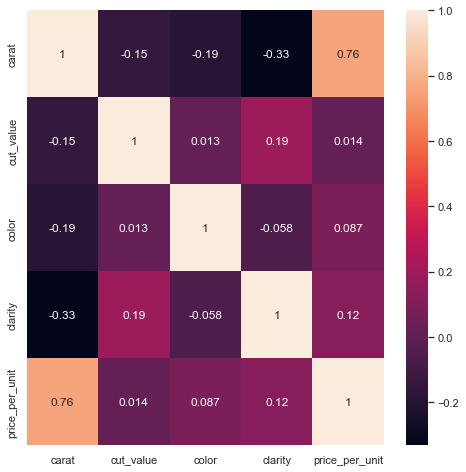

In [28]:
cmap = sns.set(style='darkgrid')
plt.subplots(figsize=(8,8))
df_imputed = df.drop(['x','y','z'], axis=1).iloc[:,:-1]
sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

&emsp; According to the correlation plot, we can see the attribute 'carat', 'cut_value', 'color' and 'clarity' have positive correlation value relative to 'price per unit'. It means that as carats, cut quality, color and clarity increase, the price per unit of the diamonds increases. Among all the relative attributes, 'carat' has the greatest impact on 'price per unit'. What's more, 'clarity' has the greatest negetive correlation value relative to 'carat'. In this case, as the diamond weight increase, the clarity of the diamond could become lower.

### 3.1.5 The plot of the scatter matrix:

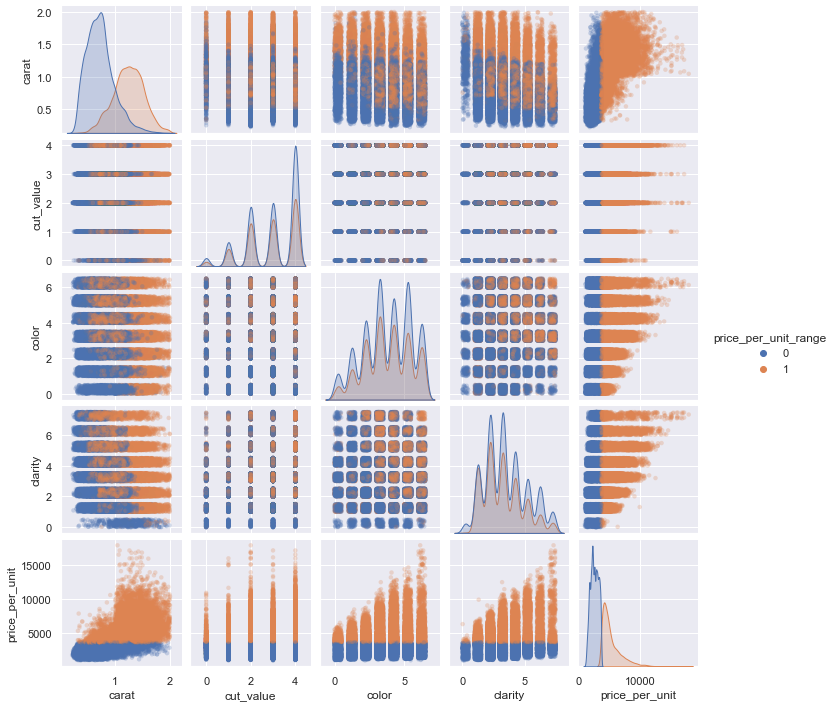

In [29]:
df_imputed = df.copy().drop(['x','y','z'], axis=1)
df_imputed[['carat', 'color', 'clarity']] += np.random.rand(len(df_imputed), 3) / 2
sns.pairplot(df_imputed, hue='price_per_unit_range', height=2,
              plot_kws=dict(s=20, alpha=0.25, edgecolor="white", linewidth=0))
plt.show()

&emsp; According to the 'clarity' and "color" subgraph in the fourth row and third column of the figure, we can see that more and more unit price of this sepecific diamond is greater than mean value of unit price of all diamonds, as the 'color' and 'clarity' value increasing. What's more, we also can see from the 'carat' and 'clarity' subgraph in the fourth row and first column of the figure, more and more unit price of this sepecific diamond is greater than mean value of unit price of all diamonds, as the 'carat' and 'clarity' value increasing. From the third and fourth column of the fifth row, the distribution forms of 'color' and 'clarity' subgraphs are very similar.

## 3.2 Ask three interesting questions:

### 3.2.1 Question 1: Does price per unit of  diamonds depend only on carat values and not on other characteristics?

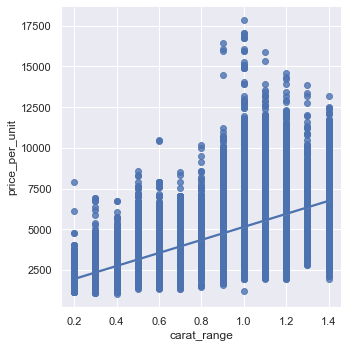

In [30]:
sns.lmplot(data=df, x='carat_range', y='price_per_unit')

&emsp; According to the figure above, we can see price per unit will generally increase as the carat range increasing. However, there still are many price per unit higher or lower than most value even if they is in the same carat range. Therefore,it can be concluded that the determining factor of unit price is not only related to carat value.

D:\Anaconda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


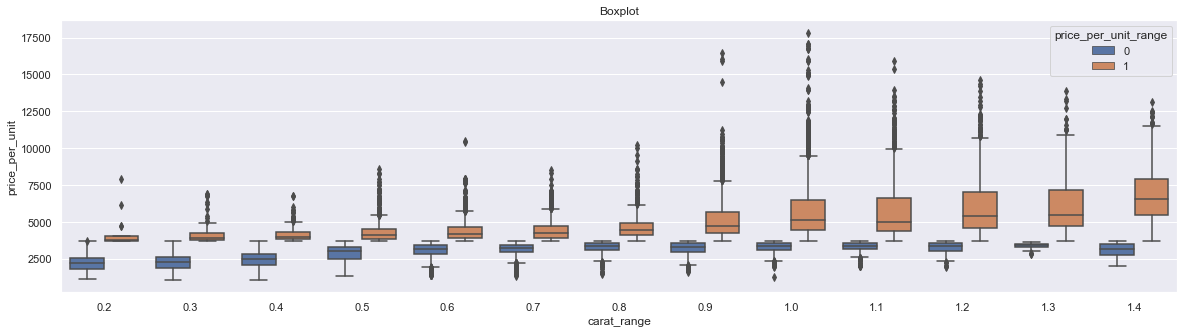

In [31]:
plt.subplots(figsize=(20,5))

sns.boxplot(x='carat_range', y='price_per_unit', hue='price_per_unit_range', data=df)
plt.title('Boxplot')

plt.show()

&emsp; By using new methods: scatter plot and box plot, we can more clearly see the price per unit distribution of diamonds at all carats. As a result, it is easy to say that the price per unit is not only related to the value of carats, but also to other characteristics, such as cut, color, clarity and so on.

### 3.2.2 Question 2: In addition to carat values, which characteristics correlations are most strongly associated with price per unit of diamonds?

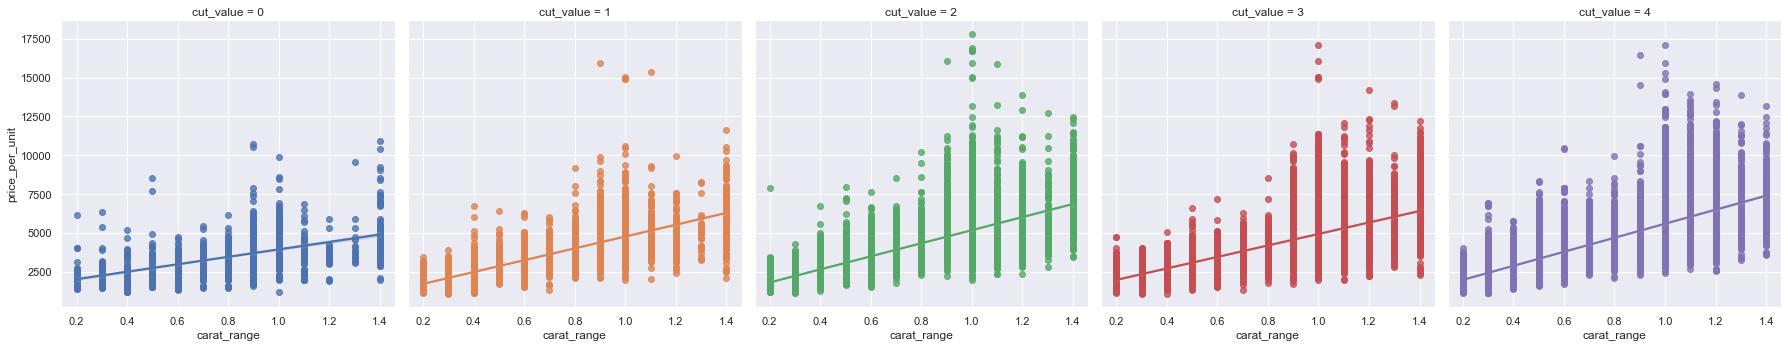

In [32]:
sns.lmplot(data=df, x='carat_range', y='price_per_unit',
           hue='cut_value', col='cut_value')

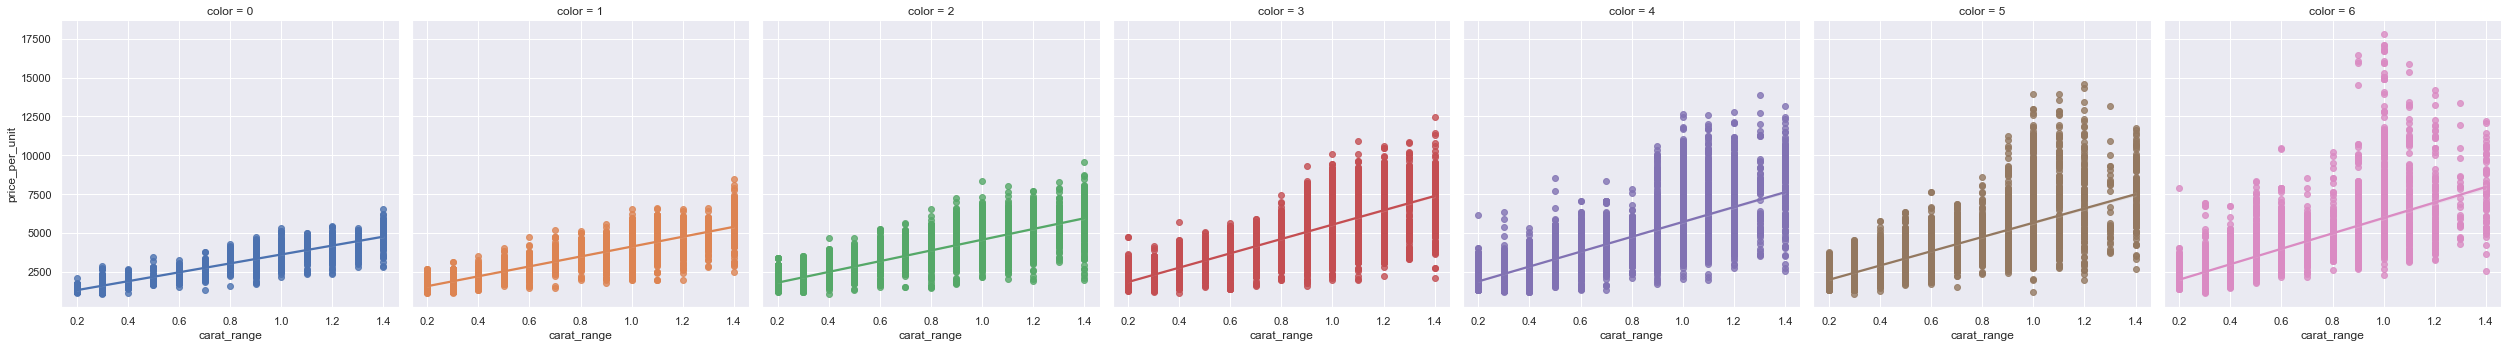

In [33]:
sns.lmplot(data=df, x='carat_range', y='price_per_unit',
           hue='color', col='color')

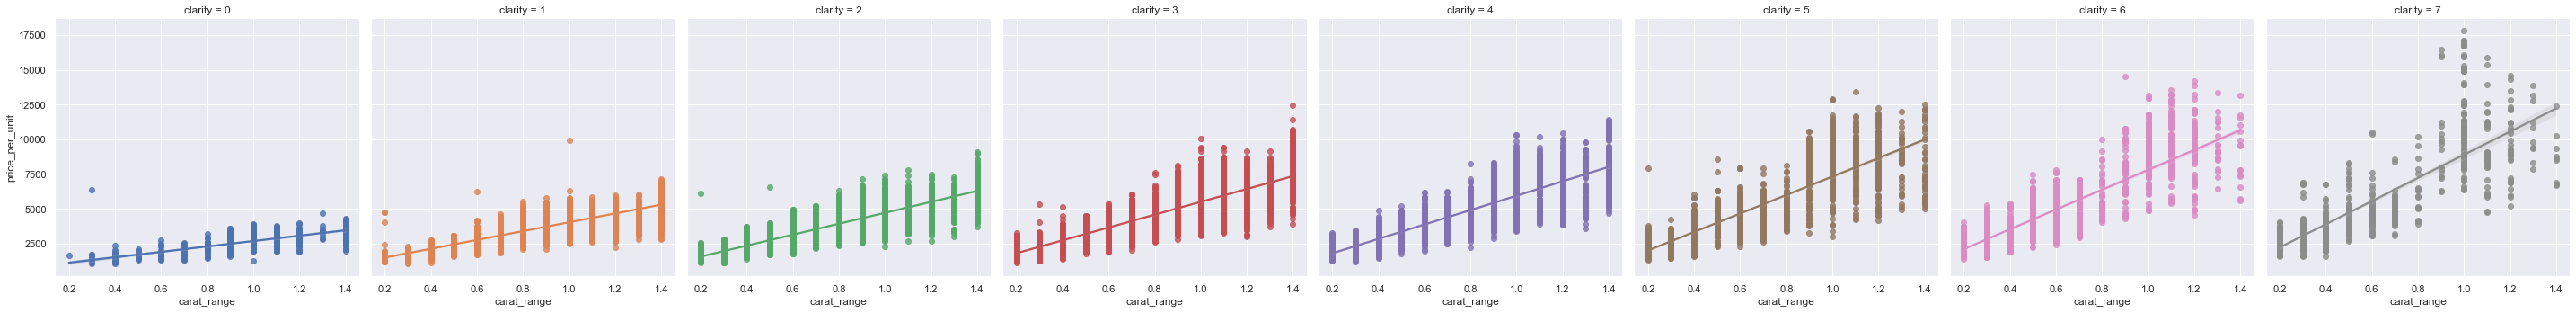

In [34]:
sns.lmplot(data=df, x='carat_range', y='price_per_unit',
           hue='clarity', col='clarity')

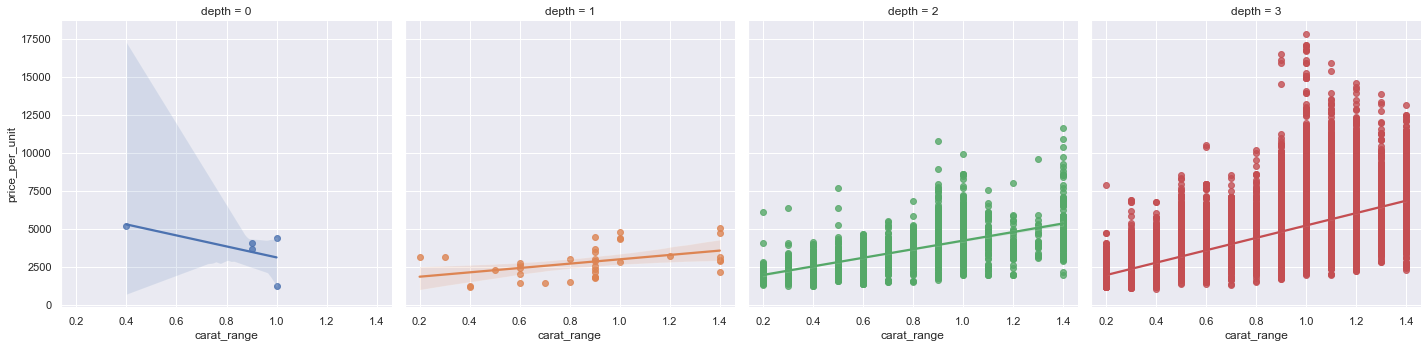

In [35]:
sns.lmplot(data=df, x='carat_range', y='price_per_unit',
           hue='depth', col='depth')

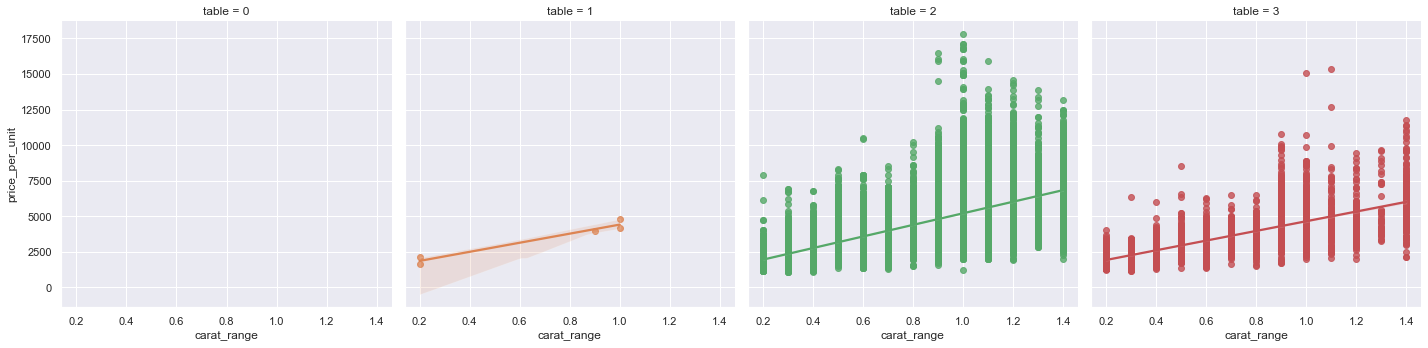

In [36]:
sns.lmplot(data=df, x='carat_range', y='price_per_unit',
           hue='table', col='table')

&emsp; On the basis of the original picture, we added an additional variable: cut, color, clarity, depth and table. From the feedback given to us by the five pictures, we found that influnce of color and clarity is great, and influnce of cut, depth and table is small. Because there will be more and more diamonds with high price per unit, as color and clarty value increasing. However, for different value of cut, depth and table, there is not much change between price per unit.

### 3.2.3 Question 3: When the carat difference is within 0.1 carat, what characteristics of the diamond greatly affect the price per unit?

### Price Per Unit of Diamonds by Cut:

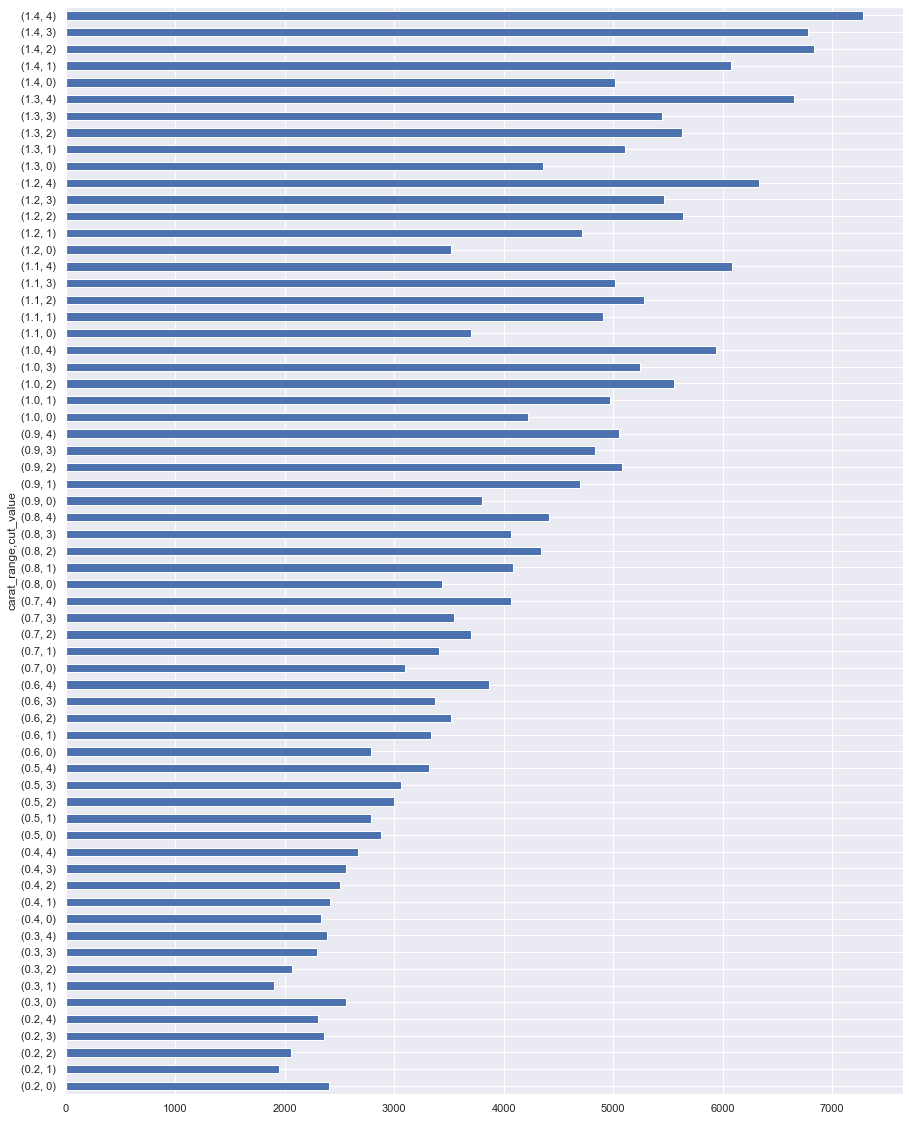

In [37]:
df_groupby_cut = df.groupby(by=['carat_range', 'cut_value'])
Price_per_unit_by_cut = df_groupby_cut.price_per_unit.sum() / df_groupby_cut.price_per_unit.count()
plt.subplots(figsize=(15,20))
Price_per_unit_by_cut.plot(kind='barh')
plt.show()

&emsp; According to the bar graph above, different cut value do not have a significant impact on the price per unit, When the carat range less than 1.0 . However, when carat range greater than 1.0, the difference of cut value will affect the price per unit of diamonds to a certain extent.

### Price Per Unit of Diamonds by Color:

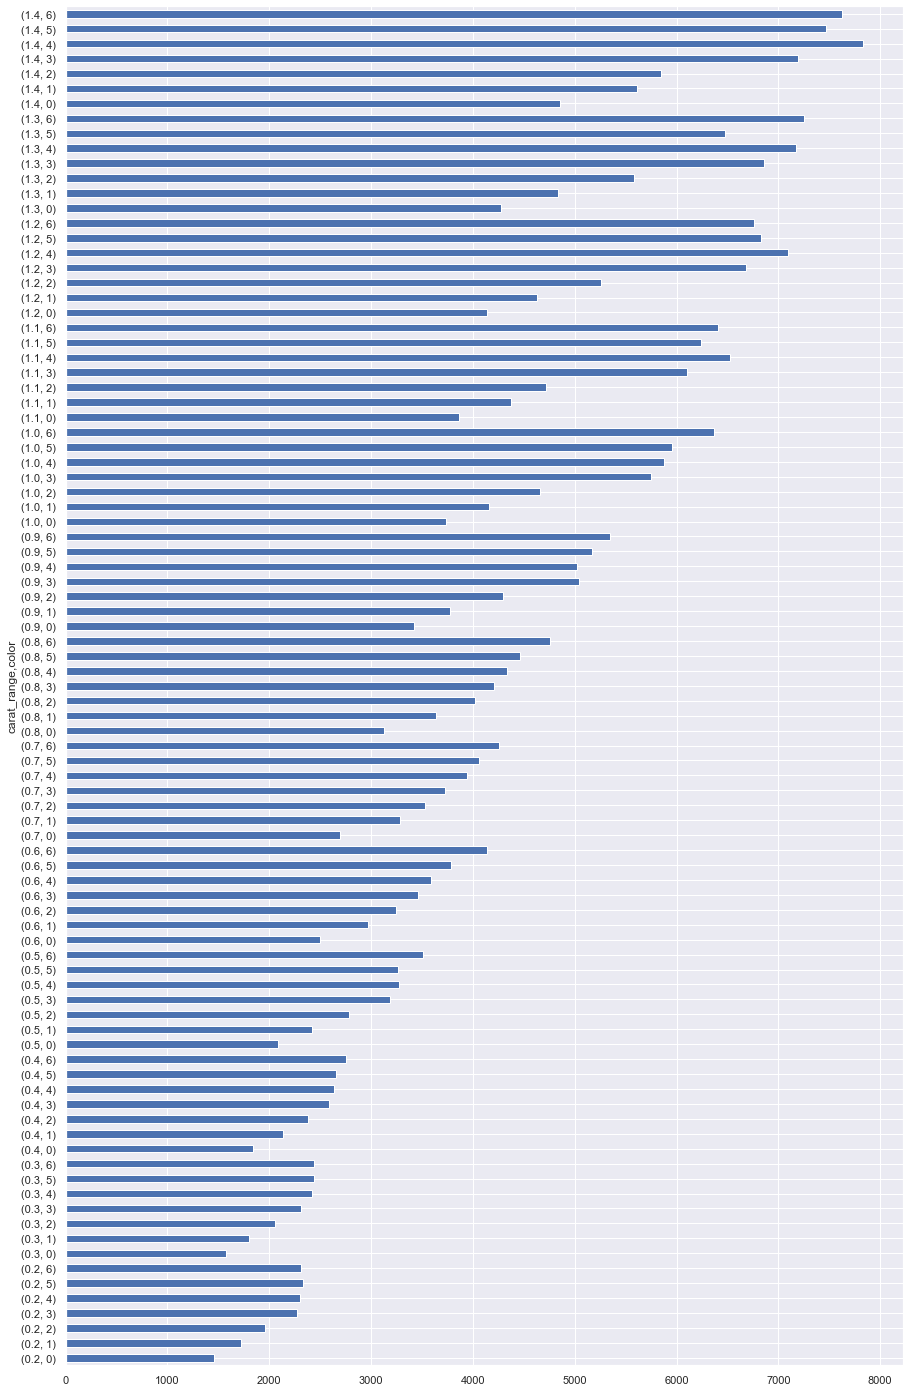

In [38]:
df_groupby_color = df.groupby(by=['carat_range', 'color'])
Price_per_unit_by_color = df_groupby_color.price_per_unit.sum() / df_groupby_color.price_per_unit.count()
plt.subplots(figsize=(15,25))
Price_per_unit_by_color.plot(kind='barh')
plt.show()

&emsp; According to the bar graph above, the price per unit will obviously increase as the color grade increassing, when the carat range stay the same. we can easily conduct that the difference of color grade has great effect on the price per unit of diamonds.

### Price Per Unit of Diamonds by Clarity:

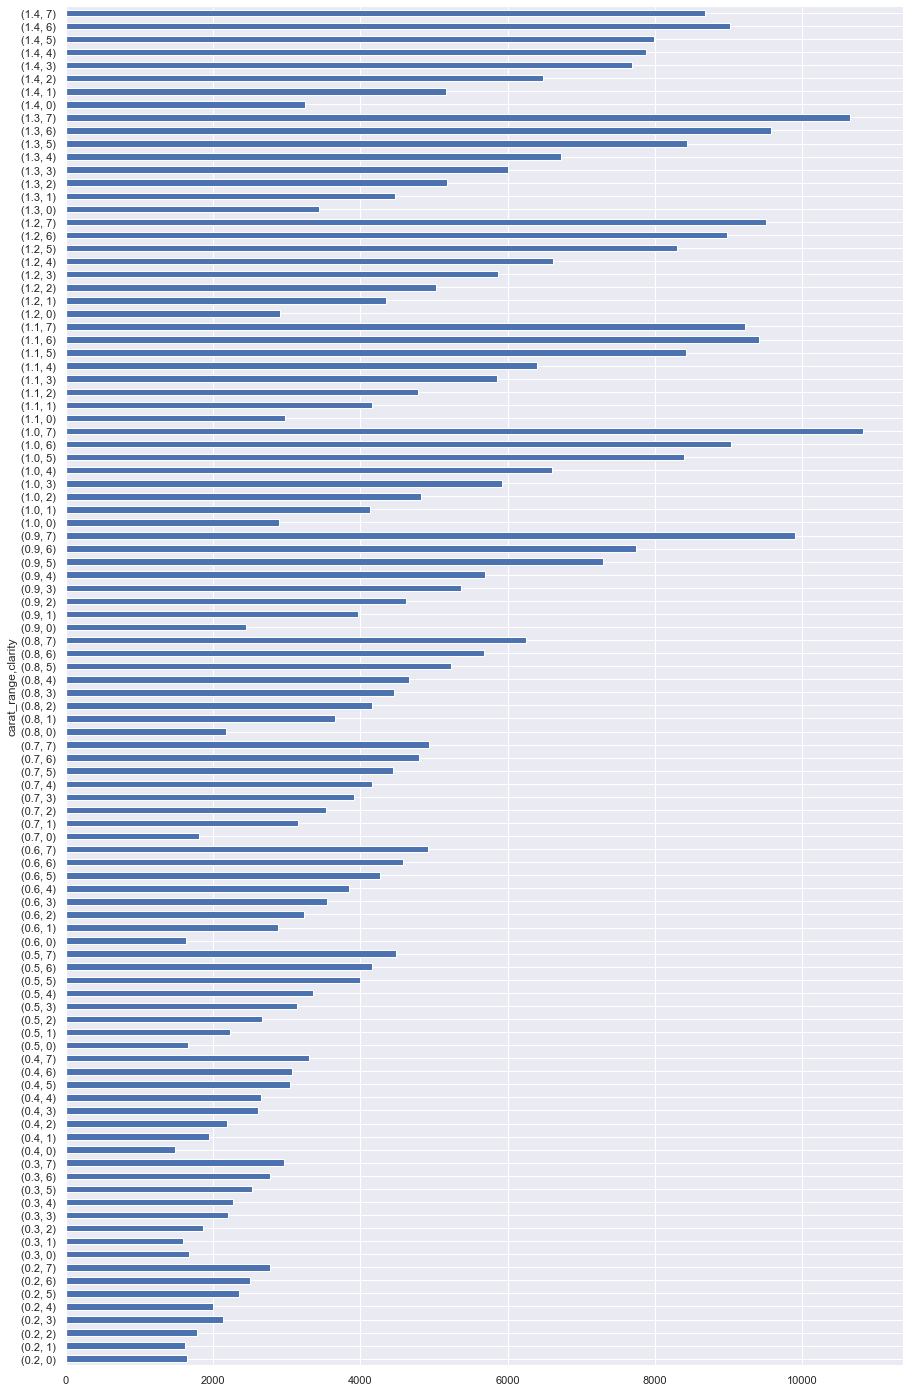

In [39]:
df_groupby_clarity = df.groupby(by=['carat_range', 'clarity'])
Price_per_unit_by_clarity = df_groupby_clarity.price_per_unit.sum() / df_groupby_clarity.price_per_unit.count()
plt.subplots(figsize=(15,25))
Price_per_unit_by_clarity.plot(kind='barh')
plt.show()

&emsp; According to the bar graph above, the price per unit will significantly increase as the clarity value increassing, while the carat range stay the same. We can easily conduct that the clarity will significantly affect the price per unit of diamonds.

### Price Per Unit of Diamonds by Depth:

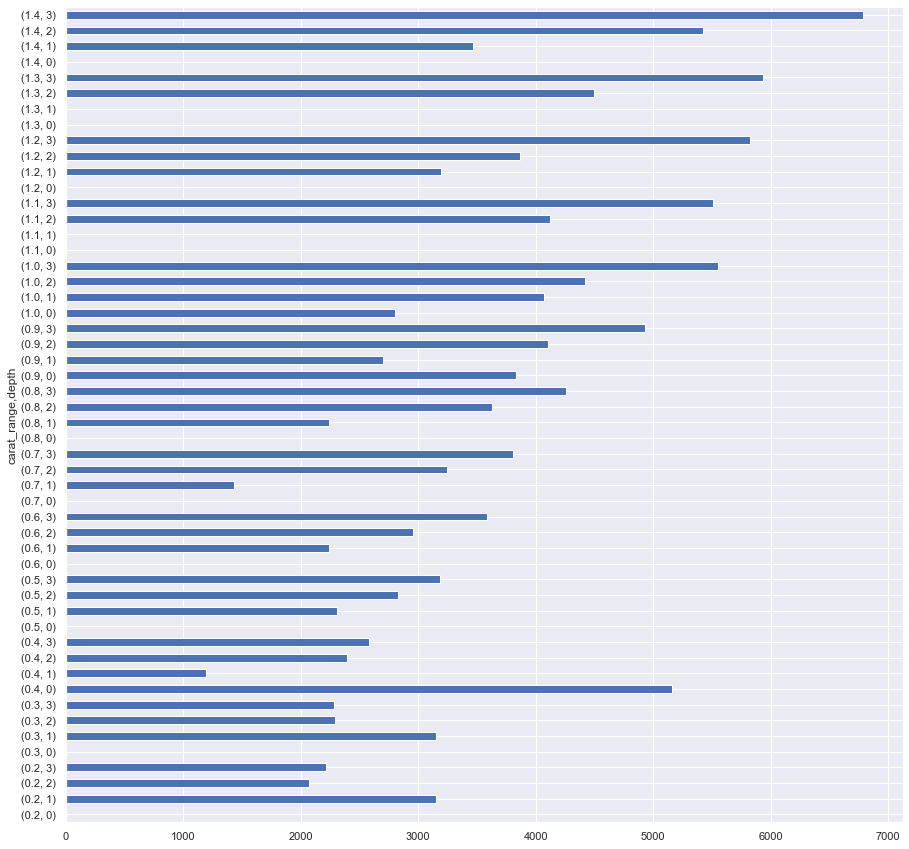

In [40]:
df_groupby_depth = df.groupby(by=['carat_range', 'depth'])
Price_per_unit_by_depth = df_groupby_depth.price_per_unit.sum() / df_groupby_depth.price_per_unit.count()
plt.subplots(figsize=(15,15))
Price_per_unit_by_depth.plot(kind='barh')
plt.show()

&emsp; According to the bar graph above, different depth value do not have a significant impact on the price per unit, When the carat range less than 0.5 . However, when carat range greater than 0.5, the increase of depth value will affect the price per unit of diamonds significantly.

### Price Per Unit of Diamonds by Table:

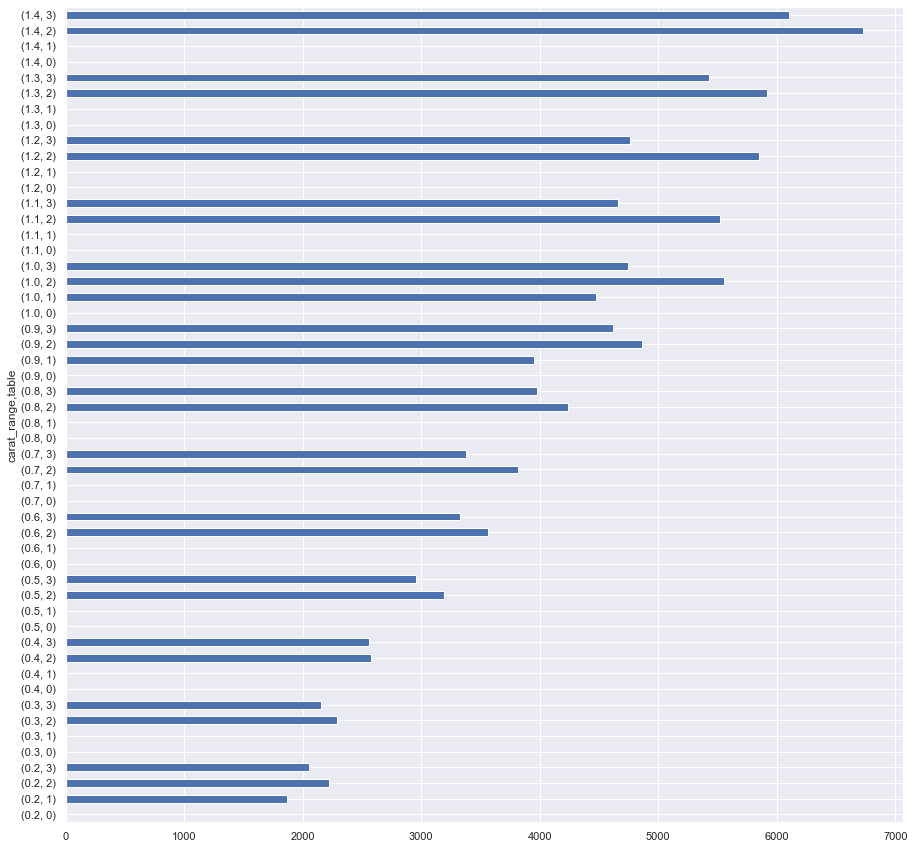

In [41]:
df_groupby_table = df.groupby(by=['carat_range', 'table'])
Price_per_unit_by_table = df_groupby_table.price_per_unit.sum() / df_groupby_table.price_per_unit.count()
plt.subplots(figsize=(15,15))
Price_per_unit_by_table.plot(kind='barh')
plt.show()

&emsp; According to the bar graph above, only in very few cases, the price per unit diamonds will increase due to the increase of table. Most of time, the price per unit diamond will decrease as the table value increassing, when the carat range is the same. We can conduct that the table has negative effect on the price per unit of diamonds.

&emsp; In summury, it is easy to say that whether diamonds are high price per unit has positive correlation feature with the color and clarity, but has no clear correlation with cut and depth. What's more, the table has negative correlation relative to price per unit diamond.

# 4. Dimensionality Reduction:

In [42]:
import umap.umap_ as umap
import umap.plot
from sklearn.preprocessing import StandardScaler

df_data = df[['carat', 'cut_value', 'color', 'clarity', 'depth', 'table', 'price_per_unit']].values
scaled_data = StandardScaler().fit_transform(df_data)

In [43]:
embedding = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(scaled_data)

<AxesSubplot:>

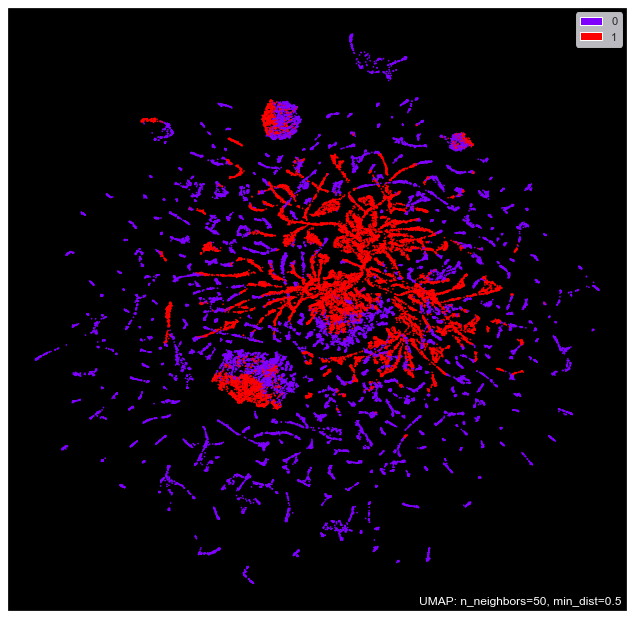

In [44]:
umap.plot.points(embedding, labels=df.price_per_unit_range, theme='fire')

&emsp; The Data in red color represents the price per unit diamond of this instance is greater than the mean value of price per unit of all instances. And data in blue color represents the price per unit diamond of this instance is less than the mean value of price per unit of all instance. The higher eigenvalue of this instance is, the more central its position in the diagram is. According to the diagram, we can see that the most of red data appear in the center. In this case, it means that every eigenvalue of the most of diamonds with high unit price also is high. A small number of red values do not focus on the center because some of their eigenvalues are low.

&emsp; The theoretical description of the algorithm works in terms of fuzzy simplicial sets[3]. Computationally this is only tractable for the one skeleton which can ultimately be described as a weighted graph. This means that, from a practical computational perspective, UMAP can ultimately be described in terms of, construction of, and operations on, weighted graphs. In particular this situates UMAP in the class of k-neighbour based graph learning algorithms such as Laplacian Eigenmaps, Isomap and t-SNE.

&emsp; As with other k-neighbour graph based algorithms, UMAP can be described in two phases. In the first phase a particular weighted k-neighbour graph is constructed. In the second phase a low dimensional layout of this graph is computed.

&emsp; At a high level, UMAP uses local manifold approximations and patches together their local fuzzy simplicial set representations to construct a topological representation of the high dimensional data. Given some low dimensional representation of the data, a similar process can be used to construct an equivalent topological representation. UMAP then optimizes the layout of the data representation in the low dimensional space, to minimize the cross-entropy between the two topological representations.

&emsp; The first step of our algorithm is to approximate the manifold we assume the data (approximately) lies on. The manifold may be known apriori (as simply R n) or may need to be inferred from the data. Suppose the manifold is not known in advance and we wish to approximate geodesic distance on it. Let the input data be X = {X1, . . ., XN}. As in the work of Belkin and Niyogi on Laplacian eigenmaps, for theoretical reasons it is beneficial to assume the data is uniformly distributed on the manifold, and even if that assumption is not made results are only valid in the limit of infinite data. In practice, finite real world data is rarely so nicely behaved. However, if we assume that the manifold has a Riemannian metric not inherited from the ambient space, we can find a metric such that the data is approximately uniformly distributed with regard to that metric.

&emsp; Formally, let M be the manifold we assume the data to lie on, and let g be the Riemannian metric on M. Thus, for each point p∈M we have gp, an inner product on the tangent space TpM.

# 5. Reference

1. Diamond Prices[https://www.diamonds.pro/education/diamond-prices/]

2. Diamond Depth and Table[https://www.diamonds.pro/education/diamond-depth-and-table/]

3. McInnes, Leland, John Healy, and James Melville. "Umap: Uniform manifold approximation and projection for dimension reduction." arXiv preprint arXiv:1802.03426 (2018).

4. UMAP Document[https://umap-learn.readthedocs.io/en/latest/]